In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pandas as pd
y1 = [np.random.random((31,))]
name_list = ['1111']
def draw_line(res_list, model_list):

    fig = plt.figure(figsize = (7,5))      
    ax1 = fig.add_subplot(1, 1, 1)
    color_list = ['tab:pink','b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:gray', 'tab:orange', 'tab:brown', 'darkred', '#5F9EA0', '#8A2BE2', '#FFF8DC', '#6495ED']

    
    for i, y in enumerate(res_list):
        print(model_list[i])
        x = np.arange(1990, 1990 + 31)
        print(res_list[i])
        print( color_list[i])
        print(model_list[i])
        p2 = pl.plot(x, res_list[i], color_list[i] , label = model_list[i])
        pl.legend(ncol=6)
    plt.ylim(-5, 5)
    plt.xlabel(u'test year')
    plt.ylabel(u'r2 score(%)')
    plt.savefig('figures/res', ppi = 1000)
# draw_line(y1, name_list)

In [87]:
def return_x(x):
    if isinstance(x, str):
        return float(x[1: -1])*100
    elif isinstance(x, float):
        return x*100
model_list = ['ols', 'ols3', 'ridge', 'lasso', 'huber', 'enet', 'pls', 'pcs', 'rf', 'gbdt', 'lgbm', 'nn1', 'nn2', 'nn3', 'nn4', 'nn5']
# model_list = ['ols', 'ols3', 'ridge', 'lasso',  'enet', 'pls', 'pcs', 'rf', 'gbdt', 'lgbm', 'nn1']
# model_list = ['ols3',  'lasso',  'enet', 'pls', 'pcs',]
# model_list = ['ols',  'ridge',   'enet', 'pls', 'pcs',  'lgbm', 'nn1']
res_list = []
for model in model_list:
    
    df = pd.read_csv(model + '/record.csv')
    res = np.array(df['test_r2'].map(lambda x: return_x(x)))
    if model == 'rf':
        res = res[:31]
    res_list.append(res)




In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pandas as pd
y1 = [np.random.random((31,))]
name_list = ['1111']
def draw_his(res_list, model_list):
    fig = plt.figure(figsize = (7,5))      
    ax1 = fig.add_subplot(1, 1, 1)
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    
    # for i, y in enumerate(res_list):
    x = np.arange(0, len(res_list) )
    p2 = pl.bar(x, res_list, color = color_list[:len(x)])
    # pl.legend()
    # pl.ylim(0, 0.2)
    print(model_list)
    plt.xticks(x, model_list, rotation=45) 
    # pl.xlabel = model_list
    plt.xlabel(u'learning rate')
    plt.ylabel(u'r2 score')
    plt.savefig('figures/abl_study.jpg', ppi = 1000)
# draw_his(y1, name_list)

[-0.01088476, -0.01431026, -0.04792061, -0.12708726, -0.20288697, -0.42184273, -0.53331193, -0.96706089, -0.95885915]
['gbdt_0001', 'gbdt_001', 'gbdt_005', 'gbdt_01', 'gbdt_02', 'gbdt_04', 'gbdt_06', 'gbdt_08', 'gbdt_1']


/tmp/ipykernel_29444/100974991.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('figures/abl_study.jpg', ppi = 1000)


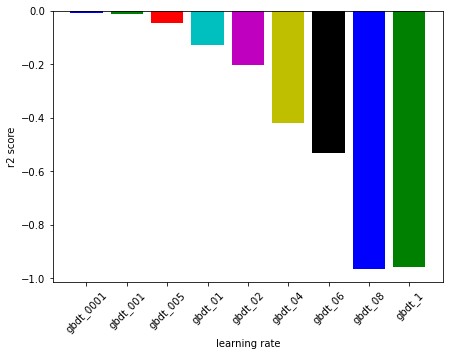

In [8]:
model = 'gbdt'
model_list = [model+'_0001', model+'_001', model+'_005',model+'_01',model+'_02',model+'_04',model+'_06',model+'_08',model+'_1']
res_list = []
for model in model_list:
    df = pd.read_csv(model + '/record.csv')
    res = np.array(df['test_r2'].map(lambda x: float(x[1: -1])))[0]
    res_list.append(res)
print(res_list)
draw_his(res_list, model_list)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pandas as pd
y1 = [np.random.random((31,))]
name_list = ['1111']
def draw_his_feature(res_list, ind_list, mask, name):
    fig = plt.figure(figsize = (7,5))      
    ax1 = fig.add_subplot(1, 1, 1)
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    res_list = res_list[mask]
    ind_list = ind_list[mask]
    df = pd.DataFrame({'ind': ind_list, 'res': res_list})
    df = df.sort_values(by = 'res')
    # for i, y in enumerate(res_list):
    x = np.arange(0, len(res_list) )
    p2 = pl.barh(x, df['res'], fc = 'b')
    # pl.legend()
    # pl.ylim(0, 0.2)
    
    # ind_list.sort_values(key = res_list)
    plt.yticks(x, df['ind'])
    plt.xticks(np.arange(0, 0.51, 0.1))
    plt.xlabel(u'importance')
    plt.ylabel(u'feature')
    plt.savefig('figures/fea_study_'+name+'.jpg', ppi = 1000)

/tmp/ipykernel_29444/842040487.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('figures/fea_study_'+name+'.jpg', ppi = 1000)


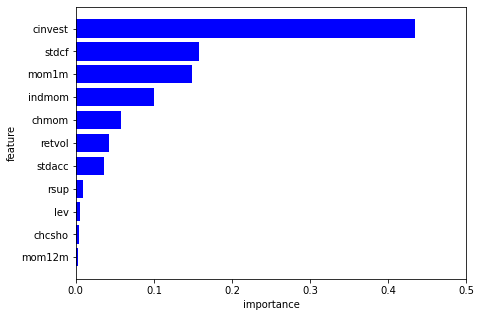

In [35]:
import pickle as pkl
a = pkl.load(open('gbdt_fi/gbdt_f_i.pkl', 'rb'))
ind = pd.read_csv('index.csv').drop(['RET','DATE','prc','SHROUT','mve0'],axis=1).copy()
ind = ind.columns
res_list = a[0]

mask = res_list > 0

draw_his_feature(res_list, ind, mask, 'gbdt')

/tmp/ipykernel_29444/842040487.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('figures/fea_study_'+name+'.jpg', ppi = 1000)


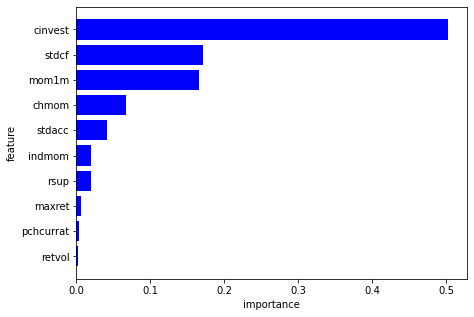

In [36]:
import pickle as pkl
a = pkl.load(open('rf_fi/rf_f_i.pkl', 'rb'))
ind = pd.read_csv('index.csv').drop(['RET','DATE','prc','SHROUT','mve0'],axis=1).copy()
ind = ind.columns
res_list = a[0]

mask = res_list > 0

draw_his_feature(res_list, ind, mask, 'rf')

/tmp/ipykernel_29444/842040487.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('figures/fea_study_'+name+'.jpg', ppi = 1000)


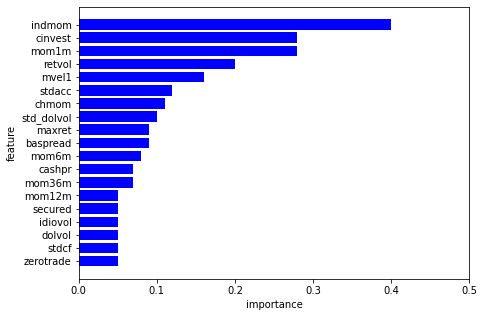

In [37]:
import pickle as pkl
a = pkl.load(open('lgbm/feature_importance0.pckl', 'rb'))
ind = pd.read_csv('index.csv').drop(['RET','DATE','prc','SHROUT','mve0'],axis=1).copy()
ind = ind.columns

res_list = a/100

mask = res_list > 0.04

draw_his_feature(res_list, ind, mask, 'lgbm')